In [85]:
import json
import numpy as np
import matplotlib.pyplot as plt
import re

In [118]:
def read_hex_data(result, results_name, variable):
    
    hex_data = result[results_name][variable]["data"]["bytes"]
    byte_data = bytes.fromhex(" ".join([format(n, "02x") for n in hex_data]))
                                       
    dtype = result[results_name][variable]["dtype"]
    shape = result[results_name][variable]["shape"]
    
    return np.frombuffer(byte_data, dtype=dtype).reshape(shape)

def read_indexed_values(result, results_name, variable):
    
    data = result[results_name][variable]
    
    return data[0]

def get_wavenumbers(file_name):
    lines = list(open(file_name))
    
    break_points = []
    
    for enum, line in enumerate(lines):
        if "[" in line:
            break_points.append(enum)
            
    frequencies = [float(re.findall(r'-?\d+\.\d+', freq_line)[0]) for freq_line in lines[break_points[1]+1:break_points[2]-1]]
    
    return np.array(frequencies)
    

def get_mode(file_name, mode, n_atoms):
    norm_coord = []
    
    lines = list(open(file_name))
        
    for enum, line in enumerate(lines):
        if f"vibration {mode}" in line:
            for mode_line in range(enum+1, enum+1+n_atoms):
                norm_coord.append([float(x) for x in re.findall(r'-?\d+\.\d+', lines[mode_line])])
                                
    return np.array(norm_coord)
                
def wavenumber_to_frequency(wavenumber):
    c = 2.99792458e10 # cm s-1
    
    frequency = wavenumber * c # cm-1 * cm s-1
    
    frequency_fs = frequency * 1e-15
    
    return frequency_fs

In [119]:
wavenumbers = get_wavenumbers("bchla_normal_modes.molden")

frequencies = wavenumber_to_frequency(wavenumbers)

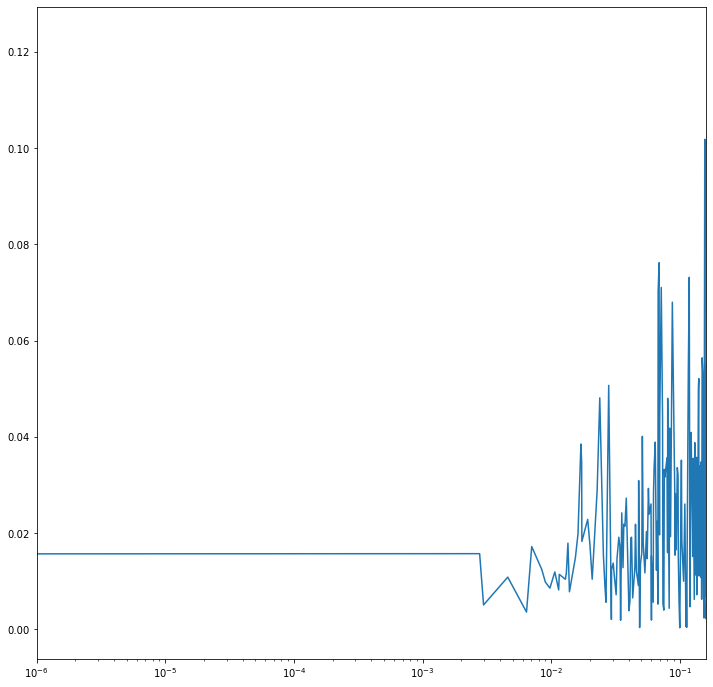

In [125]:
fig, ax = plt.subplots()

Mg_displacements = []
Na_displacements = []
Nc_displacements = []
Nb_displacements = []
Nd_displacements = []

Mg_index = 0
Nc_index = 33
Na_index = 16
Nb_index = 25
Nd_index = 25

for i in range(1, n_modes+1):
    mode_i = get_mode("bchla_normal_modes.molden", i, 140)
        
    Mg_displacements.append(np.linalg.norm(mode_i[Mg_index]))
    Na_displacements.append(np.linalg.norm(mode_i[Na_index]))
    Nc_displacements.append(np.linalg.norm(mode_i[Nc_index]))
    Nb_displacements.append(np.linalg.norm(mode_i[Nb_index]))
    Nd_displacements.append(np.linalg.norm(mode_i[Nd_index]))
    

#ax.plot(frequencies, Mg_displacements)
ax.plot(frequencies * 2 * np.pi, Na_displacements)
#ax.plot(frequencies, Nc_displacements)
#ax.plot(frequencies, Nb_displacements)
#ax.plot(frequencies, Nd_displacements)

ax.set_xlim(1e-6, 0.16)

ax.set_xscale('log')

fig.set_size_inches(12,12)